In [13]:
# 导入numpy库，用于进行科学计算
import numpy as np

# 导入matplotlib.pyplot库，用于数据可视化
import matplotlib.pyplot as plt

# 导入sympy库，用于符号数学计算
import sympy as syp

# 导入scipy库，用于科学计算和数值分析
import scipy as sp

# 导入3D绘图工具
from mpl_toolkits.mplot3d import Axes3D

下面我们首先来对一些较为简单的微分方程做一个尝试来引出我们想要讨论的`Topic`  
我们有一个方程:
$$
f''(x) + \omega^2f(x) = 0
$$
下面,我们尝试使用符号库`sympy`来求解函数$f(x)$的表达式

In [14]:
x,omega = syp.symbols("x w")

f = syp.Function("f")

equation = syp.Eq(f(x).diff(x,1) + omega**2*f(x),0)

print(syp.dsolve(equation,f(x)))

Eq(f(x), C1*exp(-w**2*x))


容易看到,对于一阶齐次线性ODE而言,sympy库可以很快的运算得出结果,那么我们下面来尝试非齐次的情况.   
对于方程
$$
f(x) - f'(x) = x^2e^x
$$
而言,其解析解应为:
$
f(x) = \frac{1}{3}x^3e^x + Ce^x,C\in \R
$

In [15]:
#x = syp.Symbol('x')

#f = syp.Function('f')

#equation1 = syp.Eq(f(x).diff(x, 1) - f(x) , x**2 * syp.exp(x))

#print(syp.dsolve(equation1, f(x)))

会发现,对于简单的非齐次函数而言,sympy仍然能处理这一问题,下面我们尝试将问题复杂化.
$$
f''(x) + \sin(x) f'(x) + f(x) = e^x  \sin(x^2)
$$

In [16]:
#x = syp.Symbol('x')
#f = syp.Function('f')

#equation2 = syp.Eq(f(x).diff(x,1) + f(x),syp.exp(x) * syp.sin(x**2))

#print(syp.dsolve(equation2,f(x)))

此时,对于非线性微分方程问题,我们发现,sympy无法给出有效的解析解,实际上,这一方面受限于sympy的解析能力,另一方面,由于非线性方程一般无法通过简单的代数运算给出解析解,所以,在不要求精确解析解的情况下,一方面,在一个`局部范围内数值计算`就成了一件必要的事情;另一方面,`解的延拓性质与唯一性`在局部范围内也成为了必须要考虑的问题

首先,我们来给出一些数学上的定义与推论:  
考虑一阶ODE问题
$$
y' = f(x,y) = f(x,y(x))
$$


`Lipschitz`条件:  
   定义:我们称$f$关于$y$满足`Lipschitz`条件,如果函数满足:
   $$
   \|f(x,y) - f(x,z)\| \leq L\|y-z\|, \forall y,z\in\mathbb{R}
   $$
   而后,我们有如下定理:
   1. 解的存在唯一性:当$f$在区域$D = \{(x,y)|a \leq x \leq b, y \in \mathbb{R} \}$满足`Lipschitz`条件时,存在连续的唯一解.
   2. 解的初值敏感性:当$f$在区域$D = \{(x,y)|a \leq x \leq b, y \in \mathbb{R} \}$满足`Lipschitz`条件时,有如下不等式成立:
   $$
   \|y(x,s_0) - y(x,s_1)\| \leq e^{L\|x - x_0\|} \|s_0 - s_1\|
   $$
   对于第二点的证明,我们可以利用`Gronwall`不等式来证明它,这里从略

下面,我们给出一些简单的数值计算办法,来完成相对简单的ODE问题.

# `Method1 Euler方法`:
Euler方法是一种最简单的数值方法，它通过简单的计算来逼近函数的数值

## 介绍

欧拉方法(Euler's method)是最简单的数值解法之一，用于求解一阶常微分方程的初值问题。其形式为：

$$y' = f(t, y), \quad y(t_0) = y_0$$

其中，$y'$ 表示 $y$ 对时间 $t$ 的导数，$f$ 是给定的函数，$y_0$ 是初始条件。

## 基本原理

欧拉方法基于局部线性近似的思想，用切线斜率来估计函数的增量。在时间间隔 $[t_n, t_{n+1}]$ 上，$y$ 的变化量 $\Delta y$ 近似为该区间内 $y'=f(t,y)$ 在点 $(t_n, y_n)$ 的值乘以时间步长 $\Delta t = t_{n+1} - t_n$，即：

$$y_{n+1} = y_n + f(t_n, y_n) \cdot \Delta t$$

## 步骤
### 初始化：
设定初始条件 $t_0, y_0$，以及步长 $\Delta t$ 和终止时间 $T$。
### 循环计算： 
* a. 计算当前点的斜率 $k = f(t_n, y_n)$。 
* b. 更新 $y$ 的值：$y_{n+1} = y_n + k \cdot \Delta t$。 
* c. 更新时间：$t_{n+1} = t_n + \Delta t$。 
* d. 检查是否达到终止条件 $t_{n+1} \leq T$，若未达到则返回步骤2a继续迭代。
### 输出结果：
最终得到一系列近似解 $(t_n, y_n)$，用于近似表示 $y(t)$ 在 $[t_0, T]$ 区间内的解。

## 注意事项
* 欧拉方法简单但精度较低，适合教学和简单问题的初步探索。
* 实际应用中，通常会采用更高阶的数值方法(如`Runge-Kutta方法`)以获得更准确的解。
* 时间步长 $\Delta$ 的选择对解的稳定性和精度至关重要，过大的步长可能导致数值不稳定或解的偏差增大。

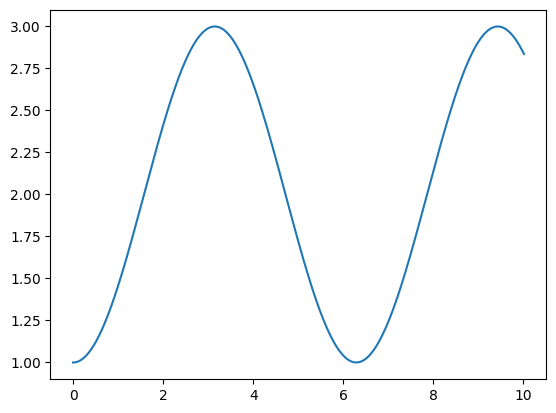

In [17]:
def euler_method(f, t_initial, y_initial, t_end1 = None, dt = 1e-2,max_iter = 1500):
    """
    使用欧拉方法求解一阶常微分方程 y' = f(t, y)
    
    参数:
    f: 函数，表示微分方程 y' = f(t, y)
    t0: 初始时间
    y0: 初始值
    t_end: 终止时间 .Default: None, 表示不指定终止时间.
    dt: 时间步长 .Default: 1e-3.
    max_iter: 最大迭代次数 .Default: 500.
    
    返回:
    t_values, y_values: 时间和对应的解的列表
    """
    t0,y0,t_end = t_initial,y_initial,t_end1
    
    t_values = [t0]
    y_values = [y0]
    
    i = 0
    
    if t_end is None:
        t_end = t0 + 10
    
    while t_values[-1] < t_end and i < max_iter:
        t_n = t_values[-1]
        y_n = y_values[-1]
        
        # 计算斜率
        k = f(t_n, y_n)
        
        # 更新y和t
        y_n_plus_1 = y_n + k * dt
        t_n_plus_1 = t_n + dt
        
        t_values.append(t_n_plus_1)
        y_values.append(y_n_plus_1)
        
        i+=1
    
    return t_values, y_values

# 示例：求解 y' = y - 2x / y, y(0) = 1
def example_function(t, y):
    return np.sin(t)

t_initial = 0
y_initial = 1


t_points, y_points = euler_method(example_function, t_initial, y_initial)
plt.plot(t_points, y_points)

# Definition: 
如果在初值问题$y' = f(x,y)$里,我们构造的迭代格式为$y_{n+1} = \varphi{(x_n,y_n,y_n+1)}$的格式,则称其为隐式迭代.  
而如果构造的迭代格式为$y_{n+1} = \varphi{(x_n,y_n)}$的格式,则称其为显式迭代.  
  
## Explicit:  
显式迭代的迭代格式为$y_{n+1} = \varphi{(x_n,y_n)}$.  
  
## Implicit:  
隐式迭代的迭代格式为$y_{n+1} = \varphi{(x_n,y_n,y_{n+1})}$.  
一般来说,对于隐式迭代而言,我们需要对某一迭代步,在进行多次迭代,即:
$$
y_{n+1}^{(k)} = \varphi{(x_n,y_n,y_{n+1}^{(k-1)})}
$$
来逐步显化这一结果,直至满足精度要求.
## 单步法:
每次迭代只需要用到$y_n,y_{n+1}$的值,即:$y_{n+1} = \varphi{(x_n,y_n,y_{n+1},h)}$

## 多步法:
每次迭代需要用到$y_n,y_{n-1},y_{n-2},...,y_{n-k}$的值,即:$y_{n} = \varphi{(x_n,y_{n+1},y_n,y_{n-1},...,y_{n-k},h)}$


下面我们来介绍改进欧拉公式

In [18]:
def avg_euler_method(f,t_initial,y_initial,t_end = None,dt = 1e-2,max_iter = 1500):
    """
    使用改进欧拉法求解ODE
    
    Parameters:
    f:函数
    t_initial:初始时间
    y_initial:初始值
    t_end:终止时间 .Default: None.
    dt:步长 .Default: 1e-3.
    max_iter: 最大迭代次数 .Default: 500.
    
    Returns:
    t_points:时间序列
    y_points:数值解序列
    """
    t_initial,y_initial,t_end = t_initial,y_initial,t_end
    
    tlist = [t_initial]
    avglist = [y_initial]
    
    i = 0
    
    if t_end is None:
        t_end = t_initial + 10
        
    while tlist[-1] < t_end and i < max_iter:
        y_p = avglist[-1] + dt * f(tlist[-1],avglist[-1])
        y_c = avglist[-1] + dt * f(tlist[-1]+dt,y_p)
    
        y = (y_p + y_c) / 2
        
        tlist.append(tlist[-1] + dt)
        avglist.append(y)
        
        i+=1
        
    return tlist,avglist

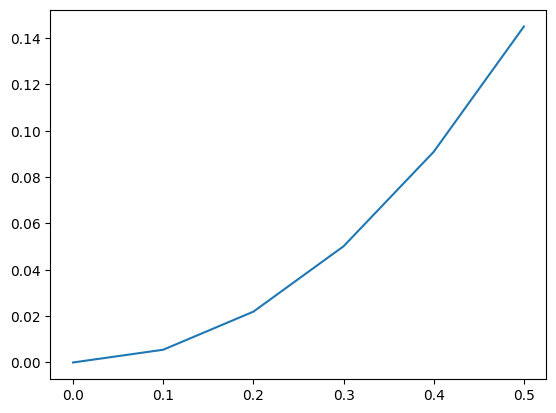

In [19]:
def func(x,y):
    return x**2 + x - y

t_points,y_points = avg_euler_method(func,0,0,0.5,dt = 0.1)

plt.plot(t_points,y_points)

`Tips`单步法的局部截断误差与阶  
对于初值问题
$$
y_{n+1} = y_n + h\varphi{(x_n,y_n,y_{n+1},h)}
$$
而言,我们定义:
$$
T_{n+1} = y_{n+1} - y_n - h\varphi{(x_n,y_n,y_{n+1},h)}
$$为其局部截断误差函数  
之所以称之为"局部",是因为我们假设在$x_n$之前均没有误差,即误差全部来自于当前步$x_n$.  
若存在最大整数p,使得局部截断误差函数满足:
$$
T_{n+1} = y(x + h) - y(x) - h\varphi{(x,y,h)} = O(h^{p+1})
$$
则称该方法具有p阶精度
$$

一般而言,我们求解一个单步法的局部截断误差与精度共分为如下两个步骤:
1. 定义:我们对函数T_{n+1}列出数学表达式
2. 对$x_{n+1}$处的点做`Taylor`展开,最终求出表达式的阶数,下面是一个简单的求解过程的图像

For Example:(P317 ex7)  
证明中点公式
$$
y_{n+1} = y_n + hf(x_n + \frac{h}{2}, y_n + \frac{h}{2}f(x_n, y_n))
$$
是二阶的  
Solution:  
![jupyter](./IMG_4741.jpg)  
多元函数的泰勒展开（Taylor Expansion）是一种将复杂函数近似表示为多项式的方法，它在数学分析中非常重要。对于一个在点$ (\mathbf{a}) $的邻域内具有连续各阶偏导数的多元函数 $(f: \mathbb{R}^n \rightarrow \mathbb{R})$，其在该点的泰勒展开式可以表示为：
$$
[ f(\mathbf{x}) = f(\mathbf{a}) + \sum_{|\alpha|=1}^k \frac{D^\alpha f(\mathbf{a})}{\alpha !} (\mathbf{x} - \mathbf{a})^\alpha + R_k(\mathbf{x}) ]
$$

这里：

* $(\mathbf{x} = (x_1, x_2, ..., x_n))$ 是多元函数的自变量向量。
* $(\mathbf{a})$ 是展开点，即我们围绕哪个点进行近似。
* $(\alpha = (\alpha_1, \alpha_2, ..., \alpha_n))$ 是一个多指标，其中每个 $(\alpha_i)$ 都是非负整数。
* $(|\alpha| = \alpha_1 + \alpha_2 + ... + \alpha_n)$ 表示指标的阶数。
* $(D^\alpha f(\mathbf{a})) 是 (f) 在点 (\mathbf{a})$ 处关于指标 $(\alpha)$ 的偏导数，也称为混合偏导数。
* $(\alpha!)$ 是多指标的阶乘，定义为 $(\alpha! = \alpha_1! \cdot \alpha_2! \cdot ... \cdot \alpha_n!)$。
* $((\mathbf{x} - \mathbf{a})^\alpha)$ 是一个乘积形式，表示为 $((x_1-a_1)^{\alpha_1} \cdot (x_2-a_2)^{\alpha_2} \cdot ... \cdot (x_n-a_n)^{\alpha_n})$。
* $(R_k(\mathbf{x}))$ 是余项，随着 (k) 增大而减小，当 (k) 趋于无穷时，若函数足够光滑且在某邻域内有界，余项趋于零。\
这个公式表明，多元函数 (f) 可以被近似为一个多项式加上一个余项，其中多项式的项数取决于我们选择展开的阶数 (k)。在实际应用中，通常会根据需要的精度来决定展开到哪一阶。

下面,我们将介绍收敛阶和收敛速度更好的`Runge-Kutta`方法.

In [20]:
def runge_kutta(f,t_initial,y_initial,t_end = None,dt = 1e-2,order = 4,max_iter = 1500):
    """
    使用order阶Runge-Kutta法求解ODE
    
    Parameters:
    f:函数
    t_initial:初始时间
    y_initial:初始值
    t_end:终止时间 .Default: None.
    order:阶数 .Default: 4.
    dt:步长 .Default: 1e-3.
    max_iter: 最大迭代次数 .Default: 500.
    
    Returns:
    t_points:时间序列
    y_points:数值解序列
    """
    
    t_initial,y_initial,t_end = t_initial,y_initial,t_end
    
    tlist = [t_initial]
    avglist = [y_initial]
    
    i = 0
    
    if t_end is None:
        t_end = t_initial + 10
        
    while tlist[-1] < t_end and i < max_iter:
        
        if order == 3:
            
            k1 = f(tlist[-1],avglist[-1])
            k2 = f(tlist[-1] + dt/2,avglist[-1] + dt/2 * k1)
            k3 = f(tlist[-1] + dt,avglist[-1] - dt * k1 + 2 * dt * k2)
            
            y = avglist[-1] + dt/6 * (k1 + 4 * k2 + k3)
            
            tlist.append(tlist[-1] + dt)
            avglist.append(y)
            
        elif order == 4:
            
            k1 = f(tlist[-1],avglist[-1])
            k2 = f(tlist[-1] + dt/2,avglist[-1] + dt/2 * k1)
            k3 = f(tlist[-1] + dt/2,avglist[-1] + dt/2 * k2)
            k4 = f(tlist[-1] + dt,avglist[-1] + dt * k3)
            
            y = avglist[-1] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
            
            tlist.append(tlist[-1] + dt)
            avglist.append(y)
        else:
            print("Function do not support this method!")
            
        i += 1
        
    return tlist,avglist
    
    

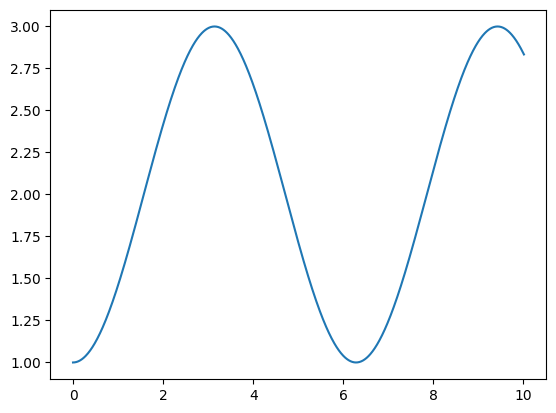

In [21]:
t_points,y_points = runge_kutta(example_function,t_initial,y_initial)

plt.plot(t_points,y_points)

下面是著名的`洛伦兹初值问题`的模型,为了更好的效果,我们采用的是Module - `scipy`中的`odeint`执行微分方程数值解

In [22]:
def lorenz(p,t,sigma,beta,rho):
    x,y,z = p.tolist()
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y-beta*z
    return dx,dy,dz

def lorenz_ode(t,x,sigma,beta,rho):
    x = sp.integrate.odeint(lorenz,x,t,args=(sigma,beta,rho))
    
    ax = plt.figure(figsize=(12,6)).gca(projection='3d')
    ax.plot(x[:,0],x[:,1],x[:,2],lw = 1.0)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    
    return x

C:\Users\hasee\AppData\Local\Temp\ipykernel_31792\3919572768.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(12,6)).gca(projection='3d')


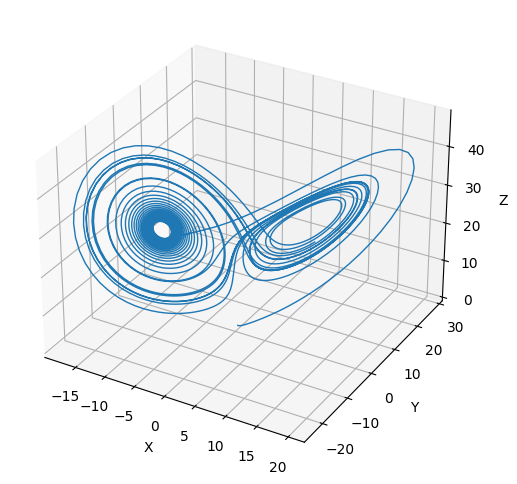

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.51228522e-02, 1.00353502e+00, 4.79004160e-04],
       [1.82774668e-01, 1.03241643e+00, 1.86842924e-03],
       ...,
       [7.34031245e+00, 1.12084822e+01, 1.85523322e+01],
       [7.73662305e+00, 1.17920752e+01, 1.89198187e+01],
       [8.15078546e+00, 1.23749599e+01, 1.93694252e+01]])

In [23]:
t = np.arange(0,30,0.01)
x0 = np.array([0,1.0,0])

lorenz_ode(t,x0,10,8/3,28)

上机练习:  
ex1:分别用Euler方法,改进的Euler方法,经典4阶Runge-Kutta方法计算
$$
\begin{cases}
y'=\frac{1}{x^2} - \frac{y}{x},1 \leq x \leq 2,\\
y(1)=1.
\end{cases}
$$
取步长h = 0.1,画出数值解图像

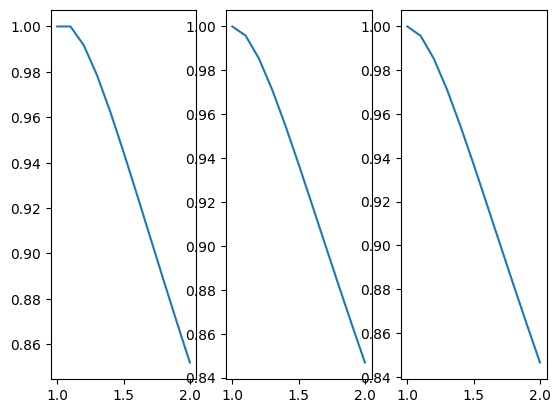

In [24]:
def f_1(x,y):
    return 1/x**2 - y / x

t_points1,y_points1 = euler_method(f_1,1,1,2,0.1)
t_points2,y_points2 = avg_euler_method(f_1,1,1,2,0.1)
t_points3,y_points3 = runge_kutta(f_1,1,1,2,0.1)
plt.subplot(1,3,1).plot(t_points1,y_points1)
plt.subplot(1,3,2).plot(t_points2,y_points2)
plt.subplot(1,3,3).plot(t_points3,y_points3)